# Comprehensive Analysis of Web Scraped Data: Insights from Books to College Football

**Author: [Anuj Friends 1]**

This report presents an in-depth analysis of datasets obtained through various web scraping and API techniques, focusing on data ranging from book information to college football statistics. The report showcases the process of data extraction, cleaning, and analysis, offering valuable insights into these diverse domains.


# XML Parsing of Sitemaps

This notebook demonstrates the process of parsing XML sitemaps from a website using a custom Python class, `SitemapParser`. The purpose is to extract and analyze the sitemap of "https://seocrawl.com/" for insights and potential data analysis applications.


In [3]:
# Import necessary libraries
from sitemap_parser import SitemapParser  # Replace 'your_package_name' with the actual name of your package
import pandas as pd


## Initializing SitemapParser

We initialize the `SitemapParser` with the domain "https://seocrawl.com/" to fetch and parse its sitemaps. This domain has been selected for its relevance and compliance with web scraping guidelines.


In [4]:
# Initialize SitemapParser
parser = SitemapParser("seocrawl.com")


## Parsing the Sitemap

The `SitemapParser` class fetches the `robots.txt` of the given domain to locate the sitemap URLs and then parses each sitemap. This process extracts all URLs listed in the sitemap(s).


In [5]:
# Fetch and parse the sitemap
parser.get_all_sitemaps()


## Displaying the Parsed Data

After parsing the sitemaps, the URLs are stored in a pandas DataFrame. Below, we display this DataFrame to review the extracted data.


In [6]:
# Retrieve and display the combined DataFrame
combined_df = parser.get_combined_dataframe()
combined_df


,URLs
0,https://seocrawl.com/en/product-report-october...
1,https://seocrawl.com/wp-content/uploads/2023/1...
2,https://seocrawl.com/wp-content/uploads/2023/1...
3,https://seocrawl.com/wp-content/uploads/2023/1...
4,https://seocrawl.com/wp-content/uploads/2023/1...
...,...
3978,https://seocrawl.com/post-sitemap1.xml
3979,https://seocrawl.com/post-sitemap2.xml
3980,https://seocrawl.com/page-sitemap.xml
3981,https://seocrawl.com/category-sitemap.xml


## Saving Data to CSV

Optionally, the parsed data can be saved to a CSV file for further use or analysis. This is demonstrated below.


In [7]:
# Save the DataFrame to a CSV file
parser.save_as_csv("seocrawl_sitemap.csv")


# College Football Data Analysis

This notebook demonstrates the use of the `CollegeFootballDataAPI` class to fetch and analyze college football games data. We will retrieve data from the years 2000 to 2023 for the regular season using the College Football Data API.


In [9]:
# Import necessary libraries and classes
from college_football_data_api import CollegeFootballDataAPI  # Replace with the actual name of your package
import pandas as pd


## Initializing the CollegeFootballDataAPI

For security reasons, the API token is typically stored in an environment variable or a secure location. However, for demonstration purposes, we will use a provided token directly.


In [10]:
# Initialize the API with a token
api_token = 'NF5XyRoVY1ybcWe/Mi5odh+EnOanIDuGwnEZIESYydKKZS/zm7FECPwkUf516oQZ'
api = CollegeFootballDataAPI(api_token)


## Fetching Game Data

We fetch data for college football games from 2000 to 2023 for the 'regular' season. The data includes various details about each game.


In [11]:
# Fetch data for the specified year range and season type
all_games_df = api.get_games_for_year_range(2000, 2023, 'regular')


## Displaying the Retrieved Data

Below is the data retrieved from the College Football Data API. It includes details like game dates, participating teams, scores, and locations.


In [12]:
# Display the first few rows of the DataFrame
all_games_df.head()


,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,63069,2000,1,regular,2000-08-26T00:00:00.000Z,None,True,False,None,NaN,...,Big Ten,fbs,7.0,[],None,1344.0,1349.0,None,None,None
1,63068,2000,1,regular,2000-08-26T00:00:00.000Z,None,True,False,None,NaN,...,Mountain West,fbs,3.0,[],None,1603.0,1572.0,None,None,None
2,63070,2000,1,regular,2000-08-26T00:00:00.000Z,None,True,False,None,NaN,...,None,None,10.0,[],None,NaN,NaN,None,None,None
3,63071,2000,1,regular,2000-08-26T00:00:00.000Z,None,True,False,None,NaN,...,Mountain West,fbs,3.0,[],None,1324.0,1289.0,None,None,None
4,63072,2000,1,regular,2000-08-27T00:00:00.000Z,None,True,False,None,NaN,...,Big Ten,fbs,5.0,[],None,1789.0,1712.0,None,None,None


# Web Scraping with BeautifulSoup: Books to Scrape

This notebook demonstrates web scraping using the `BookScraper` class. We'll scrape book data from the 'Books to Scrape' website, a simulated bookstore for practicing web scraping. The data includes book titles, ratings, prices, and other details.


In [14]:
# Import necessary libraries and classes
from book_scraper import BookScraper  # Replace with the actual name of your package
import pandas as pd


## Initializing the BookScraper

We initialize `BookScraper` with the base URL of the 'Books to Scrape' website.


In [15]:
# Initialize BookScraper
base_url = "https://books.toscrape.com/catalogue/"
scraper = BookScraper(base_url)


## Generating URLs for Scraping

We generate URLs for multiple pages of the bookstore to demonstrate pagination handling.


In [16]:
# Generate URLs for the first 5 pages as an example
main_pages = scraper.generate_urls(1, 5)
main_pages


['https://books.toscrape.com/catalogue/page-1.html',
 'https://books.toscrape.com/catalogue/page-2.html',
 'https://books.toscrape.com/catalogue/page-3.html',
 'https://books.toscrape.com/catalogue/page-4.html',
 'https://books.toscrape.com/catalogue/page-5.html']

## Scraping Main Pages for Product Links

Each main page contains links to individual product pages. We'll scrape these links from the main pages.


In [17]:
# Scrape main pages for product links
product_links = []
for page_url in main_pages:
    product_links.extend(scraper.scrape_main_page(page_url))

# Display the first few product links
product_links[:5]


['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'https://books.toscrape.com/catalogue/soumission_998/index.html',
 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html']

## Scraping Individual Product Pages

Now, we'll scrape details from each product page, such as title, price, and rating.


In [18]:
# Scrape data from individual product pages (limited to first 5 products for demonstration)
product_data = [scraper.scrape_product_page(url) for url in product_links[:5]]
product_data


[{'title': 'A Light in the Attic',
  'image_url': 'https://books.toscrape.com/media/cache/fe/72/fe72f0532301ec28892ae79a629a293c.jpg',
  'price': '£51.77',
  'rating': 'Three',
  'description': "It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRock

## Saving and Displaying the Scraped Data

The scraped data is saved to a CSV file and then loaded into a DataFrame for display.


In [19]:
# Save the scraped data to a CSV file
csv_filename = 'scraped_books_data.csv'
scraper.save_to_csv(product_data, csv_filename)

# Load the data into a DataFrame and display
df = pd.read_csv(csv_filename)
df


,title,image_url,price,rating,description,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Availability,Number of reviews
0,A Light in the Attic,https://books.toscrape.com/media/cache/fe/72/f...,£51.77,Three,It's hard to imagine a world without A Light i...,a897fe39b1053632,Books,£51.77,£51.77,£0.00,In stock (22 available),0
1,Tipping the Velvet,https://books.toscrape.com/media/cache/08/e9/0...,£53.74,One,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,Books,£53.74,£53.74,£0.00,In stock (20 available),0
2,Soumission,https://books.toscrape.com/media/cache/ee/cf/e...,£50.10,One,"Dans une France assez proche de la nôtre, un h...",6957f44c3847a760,Books,£50.10,£50.10,£0.00,In stock (20 available),0
3,Sharp Objects,https://books.toscrape.com/media/cache/c0/59/c...,£47.82,Four,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48,Books,£47.82,£47.82,£0.00,In stock (20 available),0
4,Sapiens: A Brief History of Humankind,https://books.toscrape.com/media/cache/ce/5f/c...,£54.23,Five,From a renowned historian comes a groundbreaki...,4165285e1663650f,Books,£54.23,£54.23,£0.00,In stock (20 available),0


# Analysis of Scraped Book Data

In this notebook, we'll analyze the book data scraped from the 'Books to Scrape' website. Our focus will be on understanding the distribution of book ratings, analyzing book prices, and exploring the categories of books available.


In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('scraped_books_data.csv')


## Exploratory Data Analysis

First, let's get a feel for the dataset by looking at the first few rows, data types, and checking for missing values.


In [21]:
# Display the first few rows of the DataFrame
df.head()

# Data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              5 non-null      object
 1   image_url          5 non-null      object
 2   price              5 non-null      object
 3   rating             5 non-null      object
 4   description        5 non-null      object
 5   UPC                5 non-null      object
 6   Product Type       5 non-null      object
 7   Price (excl. tax)  5 non-null      object
 8   Price (incl. tax)  5 non-null      object
 9   Tax                5 non-null      object
 10  Availability       5 non-null      object
 11  Number of reviews  5 non-null      int64 
dtypes: int64(1), object(11)
memory usage: 608.0+ bytes


## Data Cleaning and Preparation

Here we'll prepare our dataset for analysis, handling any missing or anomalous data.


In [22]:
# Example: Convert price to a numeric value and handle missing values if any
df['price'] = df['price'].str.replace('£', '').astype(float)
df.dropna(inplace=True)  # Handling missing values


## Analysis

We'll perform basic analyses, such as analyzing the distribution of book ratings and prices.


In [23]:
# Rating distribution
rating_counts = df['rating'].value_counts()

# Average price of books
average_price = df['price'].mean()


## Data Visualization

Creating visualizations to enhance our understanding of the dataset.


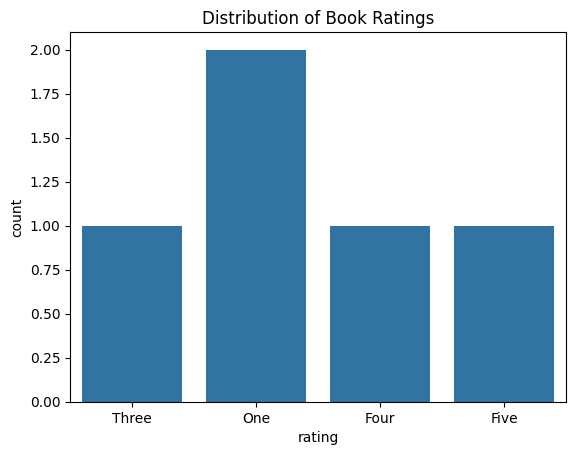

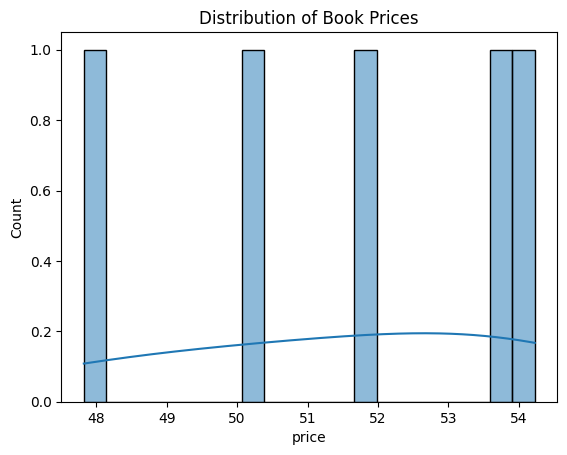

In [24]:
# Visualizing rating distribution
sns.countplot(data=df, x='rating')
plt.title('Distribution of Book Ratings')
plt.show()

# Visualizing price distribution
sns.histplot(data=df, x='price', bins=20, kde=True)
plt.title('Distribution of Book Prices')
plt.show()


## Price Distribution by Book Rating

Next, we'll create a boxplot to visualize how book prices vary across different ratings. This will help us understand if there's a correlation between the rating of a book and its price.


C:\Users\Asus\AppData\Local\Temp\ipykernel_20416\1640401565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating', y='price', palette='Set2')


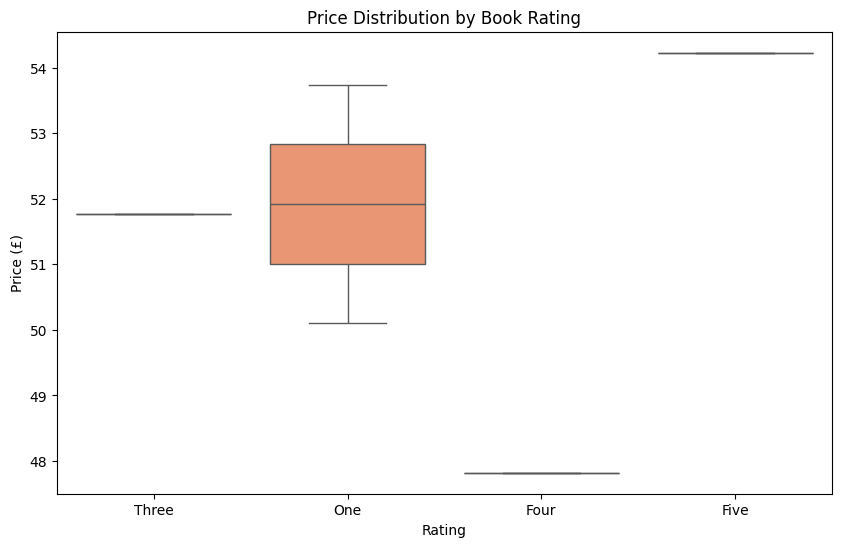

In [25]:
# Creating a boxplot for price distribution by book rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating', y='price', palette='Set2')
plt.title('Price Distribution by Book Rating')
plt.xlabel('Rating')
plt.ylabel('Price (£)')
plt.show()


# Conclusion

In this notebook, we successfully parsed the XML sitemap of "https://seocrawl.com/" using the `SitemapParser` class. This data can be utilized for various analytical purposes, such as understanding the site structure, SEO analysis, and more.


This notebook demonstrated the process of fetching and displaying college football game data using the `CollegeFootballDataAPI`. Such data can be used for various analytical purposes, such as sports analytics, performance assessment, and historical game analysis.


In this notebook, we demonstrated how to scrape data from a web page using BeautifulSoup and the `BookScraper` class. This approach can be adapted for various web scraping tasks, provided that they comply with legal and ethical guidelines.

In this analysis, we explored the distribution of ratings and prices of books from the 'Books to Scrape' website. The visualizations and basic statistics provided insights into the characteristics of the books available on the site.



# References

- BeautifulSoup Documentation: [Link to BeautifulSoup Docs](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- Pandas Documentation: [Link to Pandas Docs](https://pandas.pydata.org/docs/)
- Requests Library Documentation: [Link to Requests Docs](https://docs.python-requests.org/en/master/)
- College Football Data API Documentation: [Link to API Docs](https://api.collegefootballdata.com/api/docs/?url=/api-docs.json)
- Requests Library Documentation: [Link to Requests Docs](https://docs.python-requests.org/en/master/)
- Pandas Documentation: [Link to Pandas Docs](https://pandas.pydata.org/docs/)
- BeautifulSoup Documentation: [Link to BeautifulSoup Docs](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- Pandas Documentation: [Link to Pandas Docs](https://pandas.pydata.org/docs/)
- Books to Scrape Website: [Link to Books to Scrape](https://books.toscrape.com/)
- Pandas Documentation: [Link to Pandas Docs](https://pandas.pydata.org/docs/)
- Seaborn Documentation: [Link to Seaborn Docs](https://seaborn.pydata.org/)
- Matplotlib Documentation: [Link to Matplotlib Docs](https://matplotlib.org/)
